In [1]:
# Install spant
devtools::install_github("martin3141/spant", ref = "devel", dependencies = TRUE)

Skipping install of 'spant' from a github remote, the SHA1 (55c28adc) has not changed since last install.
  Use `force = TRUE` to force installation



In [2]:
library(tidyverse)
library(ggplot2)
library(cowplot)
library(ggthemes)
library(RColorBrewer)
library(spant)
library(ggridges)
library(ggtext)
library(viridis)

── Attaching packages ───────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘ggthemes’


The following object is masked from ‘package:cowplot’:

    theme_map


spant 1.22.0


Attaching package: ‘spant’


The following object is masked from ‘package:stats’:

    sd


Loading required package: viridisLite



In [3]:
options(repr.plot.width=12, repr.plot.height=6)

In [23]:
paths <- '/home/orco/data/MacroMols/MRS/MacroMols_7T/derivatives/PRaMM/*/*/*/*lr-special*.coord'
coords <- Sys.glob(paths, dirmark = FALSE)

In [24]:
c = read_lcm_coord(coords[1])

In [25]:
coords[1]

[1] "/home/orco/data/MacroMols/MRS/MacroMols_7T/derivatives/PRaMM/sub-701/mrs/sub-701_nuc-1H_loc-pcc_spec-lr-specialavg_ecc_hlsvd/sub-701_nuc-1H_loc-pcc_spec-lr-specialavg_ecc_hlsvd.coord"

In [26]:
df <- data.frame(c$res_tab)
df

,amps.Ala,amps.Asp,amps.PCho,amps.Cr,amps.PCr,amps.GABA,amps.Gln,amps.Glu,amps.GSH,amps.Ins,⋯,crlbs.MM2.74,crlbs.MM3.00,crlbs.MM3.21,crlbs.MM3.59,crlbs.MM3.71,crlbs.MM3.79,crlbs.MM3.90,crlbs.MM4.04,diags.FWHM,diags.SNR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.439,1.089,0.714,2.667,3.125,0.886,2.347,6.817,1.358,4.004,⋯,0.3647,1.05791,1.2301,0.12639,0.53973,0.32949,0.8072,1.26117,0.039,83


In [27]:
for (c in coords[2:length(coords)]) {
    c = read_lcm_coord(c)
    df_tmp <- data.frame(c$res_tab)
    df <- rbind(df, df_tmp)
    }

In [28]:
df

,amps.Ala,amps.Asp,amps.PCho,amps.Cr,amps.PCr,amps.GABA,amps.Gln,amps.Glu,amps.GSH,amps.Ins,⋯,crlbs.MM2.74,crlbs.MM3.00,crlbs.MM3.21,crlbs.MM3.59,crlbs.MM3.71,crlbs.MM3.79,crlbs.MM3.90,crlbs.MM4.04,diags.FWHM,diags.SNR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.439,1.089,0.714,2.667,3.125,0.886,2.347,6.817,1.358,4.004,⋯,0.36470,1.05791,1.23010,0.12639,0.53973,0.32949,0.80720,1.26117,0.039,83
11,0.306,0.478,0.905,2.492,2.322,1.370,2.190,6.349,0.380,4.035,⋯,0.44379,1.56996,1.67472,0.16780,0.71412,0.43659,0.84840,1.19560,0.033,40
12,0.501,1.000,0.476,2.671,1.572,0.831,1.849,5.707,0.454,2.954,⋯,0.30344,1.01101,1.11368,0.13080,0.47980,0.28888,0.57832,0.83633,0.046,80
13,0.117,0.338,0.851,2.971,1.936,0.863,1.177,4.961,0.547,3.894,⋯,0.35190,1.09354,1.06981,0.14980,0.55081,0.34152,0.70080,0.88780,0.033,62
14,0.000,1.039,0.961,2.586,2.707,1.232,1.397,5.683,1.529,4.140,⋯,0.51414,1.71980,1.71880,0.16137,0.33528,0.20484,1.20885,1.81610,0.036,29
15,0.367,1.098,0.561,2.181,2.254,1.330,1.382,6.838,1.049,3.859,⋯,0.30810,1.03032,1.12660,0.11940,0.52220,0.31906,0.80880,1.18989,0.030,59
16,0.190,1.144,0.455,3.207,1.343,0.938,1.102,5.231,0.140,4.291,⋯,0.32249,1.13981,1.21849,0.13792,0.49368,0.30864,0.51324,0.59877,0.046,57
17,0.000,0.352,0.667,2.772,1.440,1.558,1.041,4.632,0.000,3.719,⋯,0.58008,2.04976,2.19152,0.20457,0.62008,0.36918,Inf,1.13012,0.033,32
18,0.000,1.174,0.973,3.431,1.419,1.575,1.758,6.518,0.043,4.060,⋯,0.42273,1.49478,1.82304,0.18232,0.63432,0.37415,0.49295,0.74448,0.033,46


In [30]:
df['model']='PRaMM025'

In [31]:
paths <- '/home/orco/data/MacroMols/MRS/MacroMols_7T/derivatives/PRaMM99/*/*/*/*lr-special*.coord'
coords99 <- Sys.glob(paths, dirmark = FALSE)

In [33]:
c = read_lcm_coord(coords99[1])

In [34]:
df99 <- data.frame(c$res_tab)
df99

,amps.Ala,amps.Asp,amps.PCho,amps.Cr,amps.PCr,amps.GABA,amps.Gln,amps.Glu,amps.GSH,amps.Ins,⋯,crlbs.MM2.74,crlbs.MM3.00,crlbs.MM3.21,crlbs.MM3.59,crlbs.MM3.71,crlbs.MM3.79,crlbs.MM3.90,crlbs.MM4.04,diags.FWHM,diags.SNR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.459,1.681,0.615,2.822,3.091,1.122,2.361,6.927,1.241,4.36,⋯,0.29315,0.80796,0.83956,0.14791,0.49095,0.2996,0.63444,1.11816,0.039,76


In [35]:
for (c in coords99[2:length(coords99)]) {
    c = read_lcm_coord(c)
    df_tmp <- data.frame(c$res_tab)
    df99 <- rbind(df99, df_tmp)
    }

In [36]:
df99['model']='PRaMM99'

In [37]:
dfa <- rbind(df, df99)

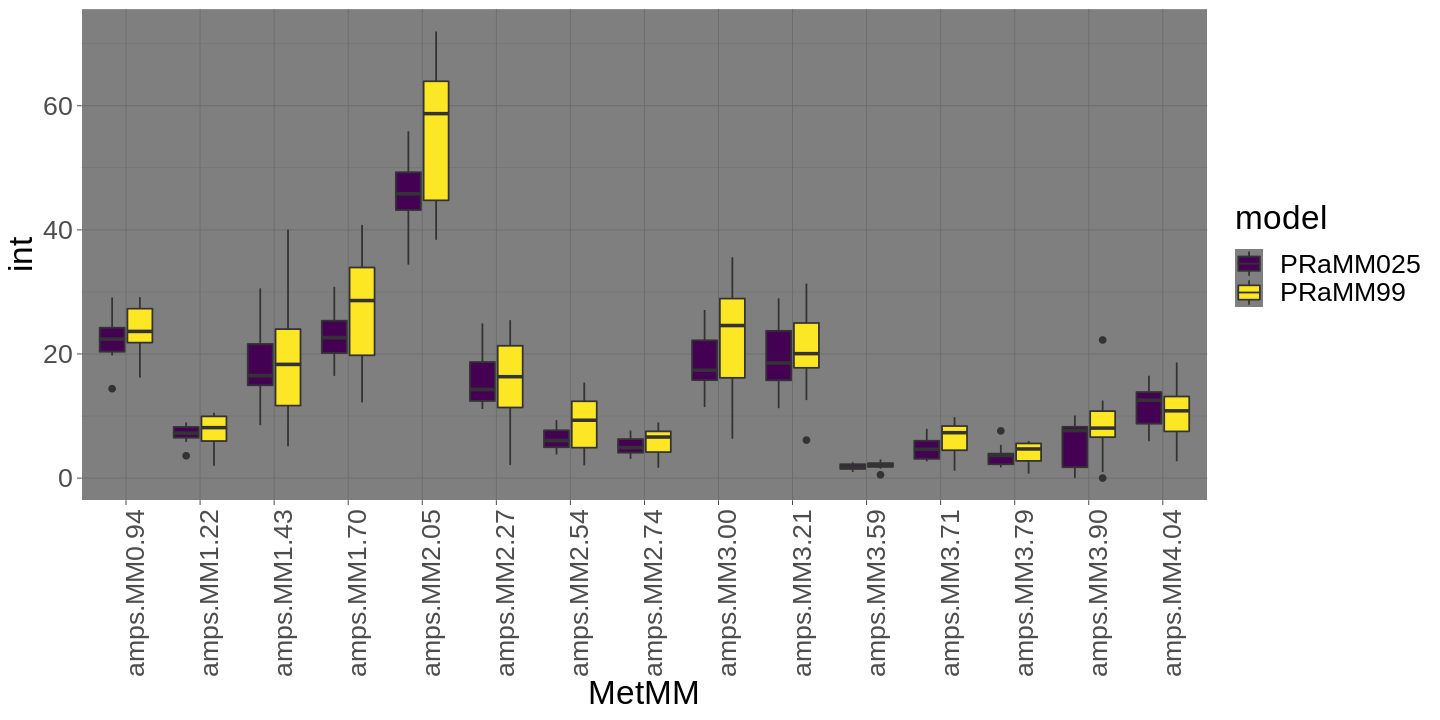

In [62]:
dfa %>% select(starts_with('amps.MM') | starts_with('mode')) %>% gather(key='MetMM',value='int', -model) %>%

ggplot(aes(x=MetMM, y=int, fill=model))+
geom_boxplot()+
scale_fill_viridis_d()+
theme_dark()+
theme(text=element_text(size=20),
     axis.text.x=element_text(angle=90))

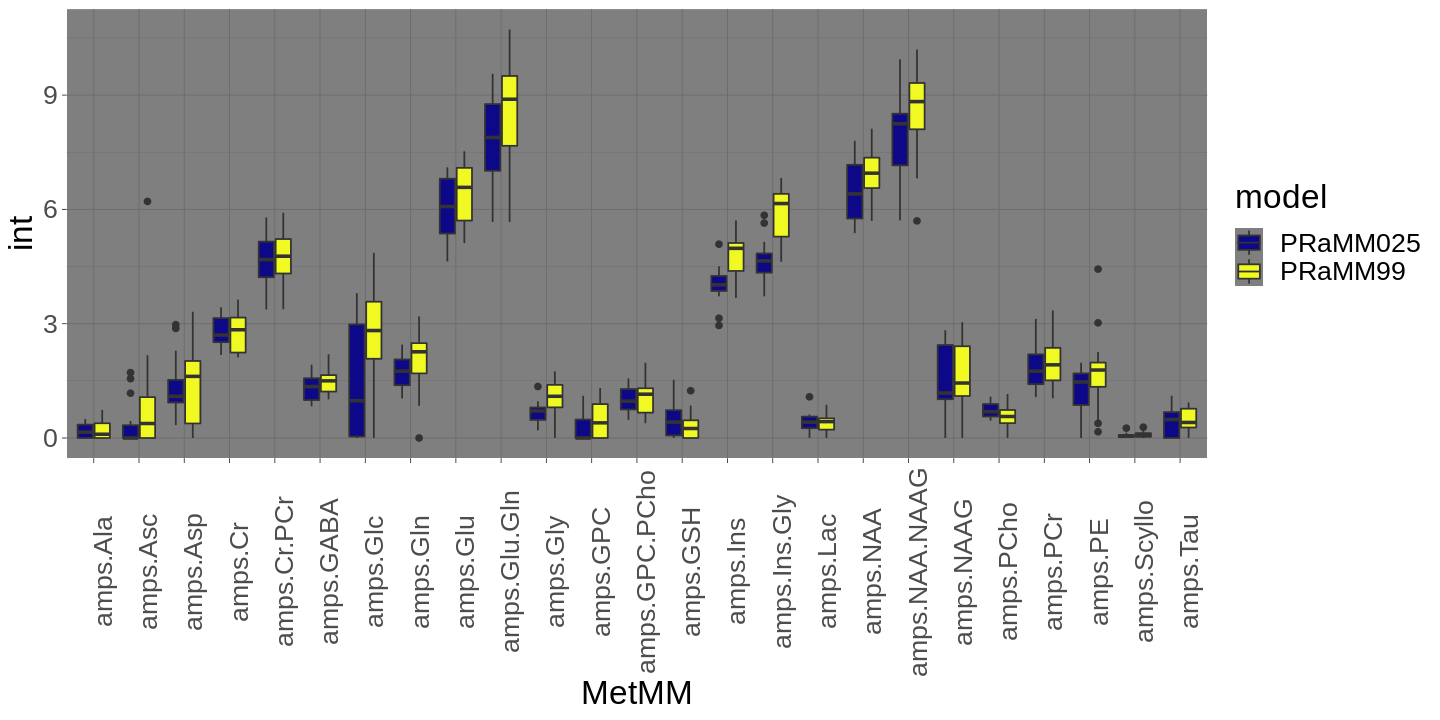

In [70]:
dfa %>% select(starts_with('amps') & !starts_with('amps.MM') | starts_with('mode')) %>% gather(key='MetMM',value='int', -model) %>%

ggplot(aes(x=MetMM, y=int, fill=model))+
geom_boxplot()+
scale_fill_viridis_d(option='plasma')+
theme_dark()+
theme(text=element_text(size=20),
     axis.text.x=element_text(angle=90))